# Movie dataset preparation 1

- dataset link: https://www.kaggle.com/stefanoleone992/imdb-extensive-dataset
- we only need 1 files:
 - IMDb_movies.csv, it contains all the details we need.
- There are 85k (approx.) movie details and we will extract movies released year >=2013.
  which is approx. 19k


In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
movie_df = pd.read_csv('dataset/IMDb_movies.csv')
movie_df.head(2)

/home/himanshu/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,...,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,...,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,$ 2250,NaN,NaN,NaN,7.0,7.0


In [11]:
print(movie_df.shape)
movie_df.columns

(85855, 22)


Index(['imdb_title_id', 'title', 'original_title', 'year', 'date_published',
       'genre', 'duration', 'country', 'language', 'director', 'writer',
       'production_company', 'actors', 'description', 'avg_vote', 'votes',
       'budget', 'usa_gross_income', 'worlwide_gross_income', 'metascore',
       'reviews_from_users', 'reviews_from_critics'],
      dtype='object')

In [12]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85855 entries, 0 to 85854
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_title_id          85855 non-null  object 
 1   title                  85855 non-null  object 
 2   original_title         85855 non-null  object 
 3   year                   85855 non-null  object 
 4   date_published         85855 non-null  object 
 5   genre                  85855 non-null  object 
 6   duration               85855 non-null  int64  
 7   country                85791 non-null  object 
 8   language               85022 non-null  object 
 9   director               85768 non-null  object 
 10  writer                 84283 non-null  object 
 11  production_company     81400 non-null  object 
 12  actors                 85786 non-null  object 
 13  description            83740 non-null  object 
 14  avg_vote               85855 non-null  float64
 15  vo

In [13]:
movie_df['r_year'] = pd.to_datetime(movie_df['year'], errors='coerce').dt.year
movie_df_final = movie_df.loc[movie_df['r_year']>=2013]
movie_df_final.head()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics,r_year
65538,tt2226321,Dark,Dark,2015,2015-11-05,"Drama, Thriller",93,USA,English,Nick Basile,...,A disturbed young woman must confront her wors...,3.5,2489,$ 400000,NaN,NaN,NaN,20.0,39.0,2015.0
65541,tt2226417,Oltre i confini del male - Insidious 2,Insidious: Chapter 2,2013,2013-10-10,"Horror, Mystery, Thriller",106,"USA, Canada",English,James Wan,...,The Lamberts believe that they have defeated t...,6.6,151336,$ 5000000,$ 83586447,$ 161919318,40.0,315.0,198.0,2013.0
65543,tt2226440,Dead Men,Dead Men,2018,2018-01-02,"Action, Western",180,USA,English,Royston Innes,...,"Set in the lawless world of the Old West, 'Dea...",4.5,294,$ 0,NaN,NaN,NaN,24.0,2.0,2018.0
65545,tt2226495,Senza uscita,Not Safe for Work,2014,2014-10-22,Thriller,74,USA,English,Joe Johnston,...,An office worker is trapped inside the buildin...,5.8,4047,NaN,NaN,NaN,NaN,34.0,14.0,2014.0
65546,tt2226519,Plush,Plush,2013,2013-10-15,"Drama, Thriller",99,USA,English,Catherine Hardwicke,...,"A young singer/songwriter, despite being marri...",5.3,3654,NaN,$ 3080,$ 28864,NaN,28.0,19.0,2013.0


In [14]:
movie_df_final.shape

(19163, 23)

<AxesSubplot:xlabel='r_year', ylabel='count'>

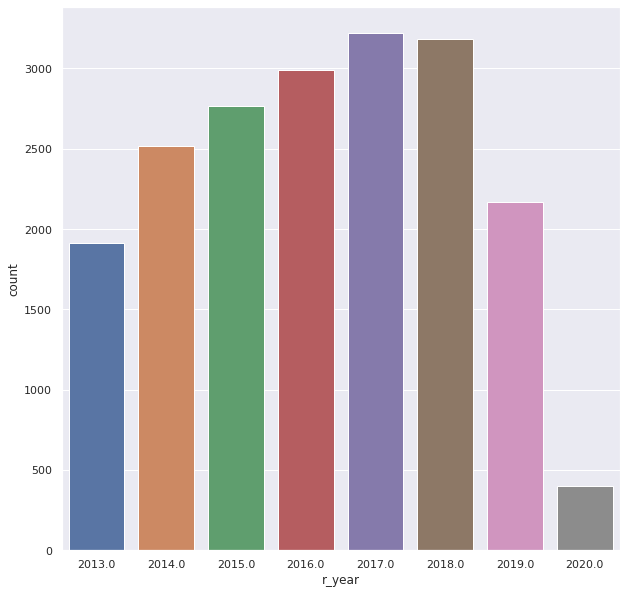

In [15]:
sns.set(rc={'figure.figsize':(10,10)})
sns.countplot(x='r_year',data=movie_df_final)

In [16]:
movie_df_final = movie_df_final.loc[:,['imdb_title_id','original_title','genre','director','actors','r_year']]

In [17]:
movie_df_final = movie_df_final.reset_index().drop(['index'],axis=1)
movie_df_final.head()

,imdb_title_id,original_title,genre,director,actors,r_year
0,tt2226321,Dark,"Drama, Thriller",Nick Basile,"Whitney Able, Alexandra Breckenridge, Michael ...",2015.0
1,tt2226417,Insidious: Chapter 2,"Horror, Mystery, Thriller",James Wan,"Patrick Wilson, Rose Byrne, Ty Simpkins, Lin S...",2013.0
2,tt2226440,Dead Men,"Action, Western",Royston Innes,"Ric Maddox, Aaron Marciniak, Richard O. Ryan, ...",2018.0
3,tt2226495,Not Safe for Work,Thriller,Joe Johnston,"Michael Gladis, Dan Bakkedahl, Max Minghella, ...",2014.0
4,tt2226519,Plush,"Drama, Thriller",Catherine Hardwicke,"Emily Browning, Xavier Samuel, Cam Gigandet, D...",2013.0


In [18]:
movie_df_final['actors'][0].split(',')[:5]

['Whitney Able',
 ' Alexandra Breckenridge',
 ' Michael Eklund',
 ' Brendan Sexton III',
 ' Benny Ash']

In [19]:
movie_df_final.shape

(19163, 6)

In [20]:
movie_df_final['title'] = movie_df_final['original_title']
movie_df_final['genres_new'] = movie_df_final['genre'].apply(lambda x: x.replace(',',''))

In [21]:
movie_df_final.head()

,imdb_title_id,original_title,genre,director,actors,r_year,title,genres_new
0,tt2226321,Dark,"Drama, Thriller",Nick Basile,"Whitney Able, Alexandra Breckenridge, Michael ...",2015.0,Dark,Drama Thriller
1,tt2226417,Insidious: Chapter 2,"Horror, Mystery, Thriller",James Wan,"Patrick Wilson, Rose Byrne, Ty Simpkins, Lin S...",2013.0,Insidious: Chapter 2,Horror Mystery Thriller
2,tt2226440,Dead Men,"Action, Western",Royston Innes,"Ric Maddox, Aaron Marciniak, Richard O. Ryan, ...",2018.0,Dead Men,Action Western
3,tt2226495,Not Safe for Work,Thriller,Joe Johnston,"Michael Gladis, Dan Bakkedahl, Max Minghella, ...",2014.0,Not Safe for Work,Thriller
4,tt2226519,Plush,"Drama, Thriller",Catherine Hardwicke,"Emily Browning, Xavier Samuel, Cam Gigandet, D...",2013.0,Plush,Drama Thriller


In [22]:
for i in range(len(movie_df_final['genres_new'])):
    x=movie_df_final['genres_new'][i].split(' ')
    for idx,val in enumerate(x):
        if val=='Science Fiction':
            x[idx]='Sci-Fi'
    movie_df_final['genres_new'][i] = ' '.join(x)
movie_df_final.head()

<ipython-input-22-a67c237bff94>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_df_final['genres_new'][i] = ' '.join(x)


,imdb_title_id,original_title,genre,director,actors,r_year,title,genres_new
0,tt2226321,Dark,"Drama, Thriller",Nick Basile,"Whitney Able, Alexandra Breckenridge, Michael ...",2015.0,Dark,Drama Thriller
1,tt2226417,Insidious: Chapter 2,"Horror, Mystery, Thriller",James Wan,"Patrick Wilson, Rose Byrne, Ty Simpkins, Lin S...",2013.0,Insidious: Chapter 2,Horror Mystery Thriller
2,tt2226440,Dead Men,"Action, Western",Royston Innes,"Ric Maddox, Aaron Marciniak, Richard O. Ryan, ...",2018.0,Dead Men,Action Western
3,tt2226495,Not Safe for Work,Thriller,Joe Johnston,"Michael Gladis, Dan Bakkedahl, Max Minghella, ...",2014.0,Not Safe for Work,Thriller
4,tt2226519,Plush,"Drama, Thriller",Catherine Hardwicke,"Emily Browning, Xavier Samuel, Cam Gigandet, D...",2013.0,Plush,Drama Thriller


In [23]:
movie_df_final.isnull().sum()

imdb_title_id      0
original_title     0
genre              0
director          39
actors            30
r_year             0
title              0
genres_new         0
dtype: int64

In [24]:
movie_df_final.dropna(inplace=True)
movie_df_final.isnull().sum()

imdb_title_id     0
original_title    0
genre             0
director          0
actors            0
r_year            0
title             0
genres_new        0
dtype: int64

In [25]:
movie_df_final.shape

(19102, 8)

In [26]:
def temp(x):
    x1 = x.split(',')
    return "".join(x1[:5])
movie_df_final['cast_new'] = movie_df_final['actors'].apply(lambda x: temp(x))

In [27]:
movie_df_final['imdb_id'] = movie_df_final['imdb_title_id']
movie_df_final.head()

,imdb_title_id,original_title,genre,director,actors,r_year,title,genres_new,cast_new,imdb_id
0,tt2226321,Dark,"Drama, Thriller",Nick Basile,"Whitney Able, Alexandra Breckenridge, Michael ...",2015.0,Dark,Drama Thriller,Whitney Able Alexandra Breckenridge Michael Ek...,tt2226321
1,tt2226417,Insidious: Chapter 2,"Horror, Mystery, Thriller",James Wan,"Patrick Wilson, Rose Byrne, Ty Simpkins, Lin S...",2013.0,Insidious: Chapter 2,Horror Mystery Thriller,Patrick Wilson Rose Byrne Ty Simpkins Lin Shay...,tt2226417
2,tt2226440,Dead Men,"Action, Western",Royston Innes,"Ric Maddox, Aaron Marciniak, Richard O. Ryan, ...",2018.0,Dead Men,Action Western,Ric Maddox Aaron Marciniak Richard O. Ryan Sha...,tt2226440
3,tt2226495,Not Safe for Work,Thriller,Joe Johnston,"Michael Gladis, Dan Bakkedahl, Max Minghella, ...",2014.0,Not Safe for Work,Thriller,Michael Gladis Dan Bakkedahl Max Minghella Fra...,tt2226495
4,tt2226519,Plush,"Drama, Thriller",Catherine Hardwicke,"Emily Browning, Xavier Samuel, Cam Gigandet, D...",2013.0,Plush,Drama Thriller,Emily Browning Xavier Samuel Cam Gigandet Dawn...,tt2226519


In [28]:
movie_df_final = movie_df_final.drop(['imdb_title_id','original_title','genre','actors'],axis=1)
movie_df_final.head()

,director,r_year,title,genres_new,cast_new,imdb_id
0,Nick Basile,2015.0,Dark,Drama Thriller,Whitney Able Alexandra Breckenridge Michael Ek...,tt2226321
1,James Wan,2013.0,Insidious: Chapter 2,Horror Mystery Thriller,Patrick Wilson Rose Byrne Ty Simpkins Lin Shay...,tt2226417
2,Royston Innes,2018.0,Dead Men,Action Western,Ric Maddox Aaron Marciniak Richard O. Ryan Sha...,tt2226440
3,Joe Johnston,2014.0,Not Safe for Work,Thriller,Michael Gladis Dan Bakkedahl Max Minghella Fra...,tt2226495
4,Catherine Hardwicke,2013.0,Plush,Drama Thriller,Emily Browning Xavier Samuel Cam Gigandet Dawn...,tt2226519


In [30]:
movie_df_final['full_string'] = movie_df_final['cast_new'] + " "+movie_df_final['director']+" "+movie_df_final['genres_new']
movie_df_final['full_string'][0]

'Whitney Able Alexandra Breckenridge Michael Eklund Brendan Sexton III Benny Ash Nick Basile Drama Thriller'

In [31]:
movie_df_final.head()

,director,r_year,title,genres_new,cast_new,imdb_id,full_string
0,Nick Basile,2015.0,Dark,Drama Thriller,Whitney Able Alexandra Breckenridge Michael Ek...,tt2226321,Whitney Able Alexandra Breckenridge Michael Ek...
1,James Wan,2013.0,Insidious: Chapter 2,Horror Mystery Thriller,Patrick Wilson Rose Byrne Ty Simpkins Lin Shay...,tt2226417,Patrick Wilson Rose Byrne Ty Simpkins Lin Shay...
2,Royston Innes,2018.0,Dead Men,Action Western,Ric Maddox Aaron Marciniak Richard O. Ryan Sha...,tt2226440,Ric Maddox Aaron Marciniak Richard O. Ryan Sha...
3,Joe Johnston,2014.0,Not Safe for Work,Thriller,Michael Gladis Dan Bakkedahl Max Minghella Fra...,tt2226495,Michael Gladis Dan Bakkedahl Max Minghella Fra...
4,Catherine Hardwicke,2013.0,Plush,Drama Thriller,Emily Browning Xavier Samuel Cam Gigandet Dawn...,tt2226519,Emily Browning Xavier Samuel Cam Gigandet Dawn...


In [32]:
movie_df_final.to_csv('dataset/2013_2020.csv')

### part 1 - Done

# Movie dataset preparation 2

- dataset link: https://www.kaggle.com/rounakbanik/the-movies-dataset
- we only need 1 files:
 - IMDb_movies.csv, it contains all the details we need.
- There are 45k (approx.) movie details and we will extract movies released year >=1970 and <2013.
  which is approx.


In [83]:
df = pd.read_csv('dataset/movies_metadata.csv')

In [84]:
df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,status,tagline,title,video,vote_average,vote_count,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,Released,NaN,Toy Story,False,7.7,5415,NaN,NaN,NaN,NaN
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413,NaN,NaN,NaN,NaN
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92,NaN,NaN,NaN,NaN
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34,NaN,NaN,NaN,NaN
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173,NaN,NaN,NaN,NaN


In [85]:
df.isnull().sum()

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                385
production_companies         4
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  24986
title                       64
video                       10
vote_average                 9
vote_count                   9
Unnamed: 24              45335
Unnamed: 25              45443
Unnamed: 26              45455
Unnamed: 27              45461
dtype: int64

In [86]:
df.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count', 'Unnamed: 24', 'Unnamed: 25',
       'Unnamed: 26', 'Unnamed: 27'],
      dtype='object')

In [87]:
df['r_year'] = pd.to_datetime(df['release_date'], errors='coerce').dt.year
df1 = df[df['r_year']>1970]
df1 = df1[df1['r_year']<2013]
df1.head(2)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,tagline,title,video,vote_average,vote_count,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,r_year
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,NaN,Toy Story,False,7.7,5415,NaN,NaN,NaN,NaN,1995.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413,NaN,NaN,NaN,NaN,1995.0


In [88]:
df1.shape

(28747, 29)

In [89]:
df.shape

(45466, 29)

In [90]:
df1 = df1.loc[:,['genres','id','imdb_id','title','r_year']]

In [91]:
df1.head()

,genres,id,imdb_id,title,r_year
0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,tt0114709,Toy Story,1995.0
1,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,tt0113497,Jumanji,1995.0
2,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,tt0113228,Grumpier Old Men,1995.0
3,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,tt0114885,Waiting to Exhale,1995.0
4,"[{'id': 35, 'name': 'Comedy'}]",11862,tt0113041,Father of the Bride Part II,1995.0


In [92]:
df2 = pd.read_csv('dataset/credits.csv')
df2.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


In [93]:
df1['id'] = df1['id'].astype(int)
df2_final = pd.merge(df1, df2, on='id')
df2_final.head()

,genres,id,imdb_id,title,r_year,cast,crew
0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,tt0114709,Toy Story,1995.0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de..."
1,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,tt0113497,Jumanji,1995.0,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de..."
2,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,tt0113228,Grumpier Old Men,1995.0,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de..."
3,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,tt0114885,Waiting to Exhale,1995.0,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de..."
4,"[{'id': 35, 'name': 'Comedy'}]",11862,tt0113041,Father of the Bride Part II,1995.0,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de..."


<AxesSubplot:xlabel='r_year', ylabel='count'>

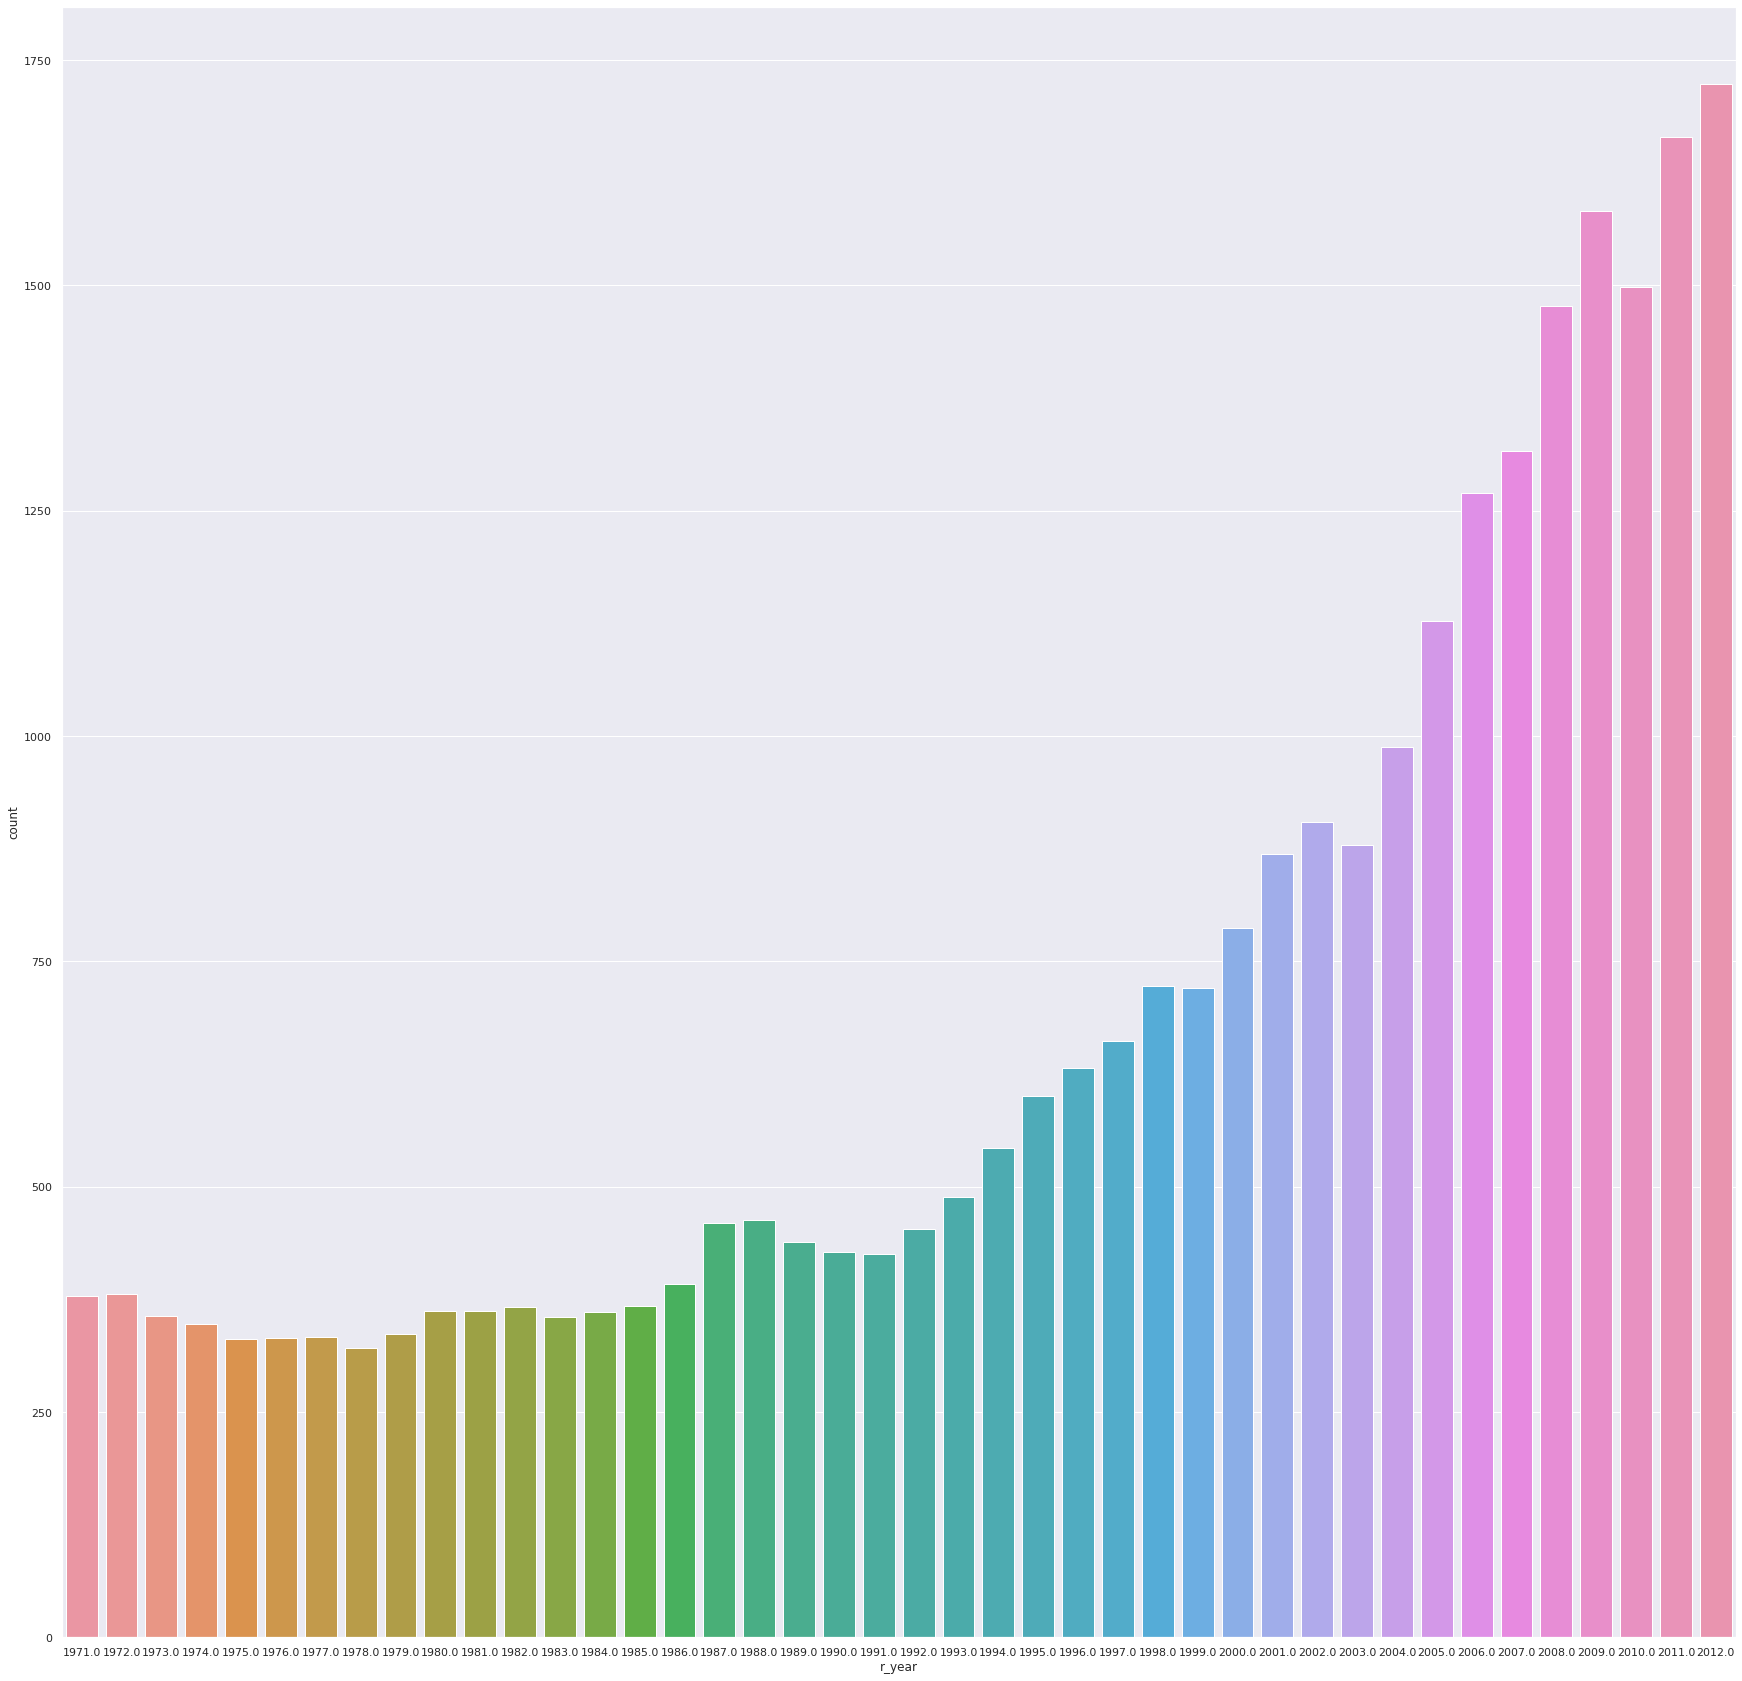

In [94]:
sns.set(rc={'figure.figsize':(30,30)})
sns.countplot(x='r_year',data=df2_final)

In [95]:
df2_final.genres[0]

"[{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}]"

In [96]:
def extract_genres(x):
    l=[]
    for i in eval(x):
        if i['name']=='Science Fiction':
            l.append('Sci-Fi')
        else:
            l.append(i['name'])
    return ' '.join(l)
df2_final['genres_new'] = df2_final['genres'].apply(lambda x: extract_genres(x))
df2_final.head()

,genres,id,imdb_id,title,r_year,cast,crew,genres_new
0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,tt0114709,Toy Story,1995.0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",Animation Comedy Family
1,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,tt0113497,Jumanji,1995.0,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",Adventure Fantasy Family
2,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,tt0113228,Grumpier Old Men,1995.0,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",Romance Comedy
3,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,tt0114885,Waiting to Exhale,1995.0,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",Comedy Drama Romance
4,"[{'id': 35, 'name': 'Comedy'}]",11862,tt0113041,Father of the Bride Part II,1995.0,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",Comedy


In [97]:
df2_final.cast[0]

"[{'cast_id': 14, 'character': 'Woody (voice)', 'credit_id': '52fe4284c3a36847f8024f95', 'gender': 2, 'id': 31, 'name': 'Tom Hanks', 'order': 0, 'profile_path': '/pQFoyx7rp09CJTAb932F2g8Nlho.jpg'}, {'cast_id': 15, 'character': 'Buzz Lightyear (voice)', 'credit_id': '52fe4284c3a36847f8024f99', 'gender': 2, 'id': 12898, 'name': 'Tim Allen', 'order': 1, 'profile_path': '/uX2xVf6pMmPepxnvFWyBtjexzgY.jpg'}, {'cast_id': 16, 'character': 'Mr. Potato Head (voice)', 'credit_id': '52fe4284c3a36847f8024f9d', 'gender': 2, 'id': 7167, 'name': 'Don Rickles', 'order': 2, 'profile_path': '/h5BcaDMPRVLHLDzbQavec4xfSdt.jpg'}, {'cast_id': 17, 'character': 'Slinky Dog (voice)', 'credit_id': '52fe4284c3a36847f8024fa1', 'gender': 2, 'id': 12899, 'name': 'Jim Varney', 'order': 3, 'profile_path': '/eIo2jVVXYgjDtaHoF19Ll9vtW7h.jpg'}, {'cast_id': 18, 'character': 'Rex (voice)', 'credit_id': '52fe4284c3a36847f8024fa5', 'gender': 2, 'id': 12900, 'name': 'Wallace Shawn', 'order': 4, 'profile_path': '/oGE6JqPP2xH4t

In [98]:
def extract_cast(x):
    l=[]
    for i in eval(x):
        l.append(i['name'])
    return ' '.join(l[:5])
df2_final['cast_new'] = df2_final['cast'].apply(lambda x: extract_cast(x))
df2_final.head()

,genres,id,imdb_id,title,r_year,cast,crew,genres_new,cast_new
0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,tt0114709,Toy Story,1995.0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",Animation Comedy Family,Tom Hanks Tim Allen Don Rickles Jim Varney Wal...
1,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,tt0113497,Jumanji,1995.0,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",Adventure Fantasy Family,Robin Williams Jonathan Hyde Kirsten Dunst Bra...
2,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,tt0113228,Grumpier Old Men,1995.0,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",Romance Comedy,Walter Matthau Jack Lemmon Ann-Margret Sophia ...
3,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,tt0114885,Waiting to Exhale,1995.0,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",Comedy Drama Romance,Whitney Houston Angela Bassett Loretta Devine ...
4,"[{'id': 35, 'name': 'Comedy'}]",11862,tt0113041,Father of the Bride Part II,1995.0,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",Comedy,Steve Martin Diane Keaton Martin Short Kimberl...


In [99]:
df2_final.crew[1]

"[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'department': 'Production', 'gender': 2, 'id': 511, 'job': 'Executive Producer', 'name': 'Larry J. Franco', 'profile_path': None}, {'credit_id': '52fe44bfc3a36847f80a7c89', 'department': 'Writing', 'gender': 2, 'id': 876, 'job': 'Screenplay', 'name': 'Jonathan Hensleigh', 'profile_path': '/l1c4UFD3g0HVWj5f0CxXAvMAGiT.jpg'}, {'credit_id': '52fe44bfc3a36847f80a7cdd', 'department': 'Sound', 'gender': 2, 'id': 1729, 'job': 'Original Music Composer', 'name': 'James Horner', 'profile_path': '/oLOtXxXsYk8X4qq0ud4xVypXudi.jpg'}, {'credit_id': '52fe44bfc3a36847f80a7c7d', 'department': 'Directing', 'gender': 2, 'id': 4945, 'job': 'Director', 'name': 'Joe Johnston', 'profile_path': '/fok4jaO62v5IP6hkpaaAcXuw2H.jpg'}, {'credit_id': '52fe44bfc3a36847f80a7cd7', 'department': 'Editing', 'gender': 2, 'id': 4951, 'job': 'Editor', 'name': 'Robert Dalva', 'profile_path': None}, {'credit_id': '573523bec3a368025100062c', 'department': 'Production', 'gender': 0, '

In [100]:
def extract_director(x):
    l=[]
    for i in eval(x):
        if i['job']=='Director':
            l.append(i['name'])
    return ' '.join(l)
df2_final['director'] = df2_final['crew'].apply(lambda x: extract_director(x))
df2_final.head()

,genres,id,imdb_id,title,r_year,cast,crew,genres_new,cast_new,director
0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,tt0114709,Toy Story,1995.0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",Animation Comedy Family,Tom Hanks Tim Allen Don Rickles Jim Varney Wal...,John Lasseter
1,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,tt0113497,Jumanji,1995.0,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",Adventure Fantasy Family,Robin Williams Jonathan Hyde Kirsten Dunst Bra...,Joe Johnston
2,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,tt0113228,Grumpier Old Men,1995.0,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",Romance Comedy,Walter Matthau Jack Lemmon Ann-Margret Sophia ...,Howard Deutch
3,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,tt0114885,Waiting to Exhale,1995.0,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",Comedy Drama Romance,Whitney Houston Angela Bassett Loretta Devine ...,Forest Whitaker
4,"[{'id': 35, 'name': 'Comedy'}]",11862,tt0113041,Father of the Bride Part II,1995.0,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",Comedy,Steve Martin Diane Keaton Martin Short Kimberl...,Charles Shyer


In [101]:
df2_final = df2_final.drop(['genres','id','cast','crew'],axis=1)
df2_final.head()

,imdb_id,title,r_year,genres_new,cast_new,director
0,tt0114709,Toy Story,1995.0,Animation Comedy Family,Tom Hanks Tim Allen Don Rickles Jim Varney Wal...,John Lasseter
1,tt0113497,Jumanji,1995.0,Adventure Fantasy Family,Robin Williams Jonathan Hyde Kirsten Dunst Bra...,Joe Johnston
2,tt0113228,Grumpier Old Men,1995.0,Romance Comedy,Walter Matthau Jack Lemmon Ann-Margret Sophia ...,Howard Deutch
3,tt0114885,Waiting to Exhale,1995.0,Comedy Drama Romance,Whitney Houston Angela Bassett Loretta Devine ...,Forest Whitaker
4,tt0113041,Father of the Bride Part II,1995.0,Comedy,Steve Martin Diane Keaton Martin Short Kimberl...,Charles Shyer


In [102]:
df2_final.isnull().sum()

imdb_id       11
title          0
r_year         0
genres_new     0
cast_new       0
director       0
dtype: int64

In [103]:
df2_final.dropna(inplace=True)
df2_final.isnull().sum()

imdb_id       0
title         0
r_year        0
genres_new    0
cast_new      0
director      0
dtype: int64

In [104]:
df2_final.shape

(28790, 6)

In [106]:
df2_final['full_string'] = df2_final['cast_new'] + " "+df2_final['director']+" "+df2_final['genres_new']
df2_final['full_string'][0]

'Tom Hanks Tim Allen Don Rickles Jim Varney Wallace Shawn John Lasseter Animation Comedy Family'

In [107]:
df2_final.head()

,imdb_id,title,r_year,genres_new,cast_new,director,full_string
0,tt0114709,Toy Story,1995.0,Animation Comedy Family,Tom Hanks Tim Allen Don Rickles Jim Varney Wal...,John Lasseter,Tom Hanks Tim Allen Don Rickles Jim Varney Wal...
1,tt0113497,Jumanji,1995.0,Adventure Fantasy Family,Robin Williams Jonathan Hyde Kirsten Dunst Bra...,Joe Johnston,Robin Williams Jonathan Hyde Kirsten Dunst Bra...
2,tt0113228,Grumpier Old Men,1995.0,Romance Comedy,Walter Matthau Jack Lemmon Ann-Margret Sophia ...,Howard Deutch,Walter Matthau Jack Lemmon Ann-Margret Sophia ...
3,tt0114885,Waiting to Exhale,1995.0,Comedy Drama Romance,Whitney Houston Angela Bassett Loretta Devine ...,Forest Whitaker,Whitney Houston Angela Bassett Loretta Devine ...
4,tt0113041,Father of the Bride Part II,1995.0,Comedy,Steve Martin Diane Keaton Martin Short Kimberl...,Charles Shyer,Steve Martin Diane Keaton Martin Short Kimberl...


In [108]:
df2_final.to_csv('dataset/1970_2012.csv')

### part 2 - Done


## Trying to Merge both df

In [ ]:
movie_df_final.shape # movie_details from 2013 to 2020

In [ ]:
df2_final.shape   # movie_details from 1970 to 2020

In [ ]:
movie_df_final.head()

In [ ]:
final_train_data = df2_final.append(movie_df_final,ignore_index=True)
final_train_data.shape

In [ ]:
final_train_data.head()

In [ ]:
final_train_data.isnull().sum()

In [ ]:
final_train_data.drop_duplicates(subset ="imdb_id", keep = 'last', inplace = True)

In [ ]:
final_train_data.shape

In [ ]:
final_train_data.to_csv('dataset/final_movie_list.csv')

# Data Preparation Done